# Helsinki City Bikes EDA

An exploration of the Kaggle Helsinki City Bikes database to extract meaningful data on Rides per Hour, departure locations, Ride distances, map locations ect.


In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("../raw_data/database.csv", low_memory=False)


In [ ]:
df = dataframe.copy()

In [ ]:
df.shape


(12157458, 14)

In [ ]:
df.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [ ]:
df.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance (m)              0
duration (sec.)           0
avg_speed (km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           0
return_longitude          0
Air temperature (degC)    0
dtype: int64

In [ ]:
df[['departure','return']] =  df[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

### Rename Columns

In [ ]:
df = df.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,12138008.000,12138008.000,12138008.000
mean,2296.183,960.187,15.650
std,24540.204,7351.542,5.498
min,-4292467.000,1.000,-5.200
25%,1000.000,344.000,12.300
50%,1739.000,586.000,16.400
75%,2869.000,971.000,19.300
max,3681399.000,5401659.000,32.900


### Removing Extreme Values

removing distances less than 50m and longer than 10K, and removing durations less than 60 secs and more than a hour.

In [ ]:
df = df[(df['distance'] > 50) & (df['distance'] < 10000) &
        (60 < df['duration']) & (df['duration'] <  3600)]

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[["distance", "duration", "temperature"]].describe()

,distance,duration,temperature
count,11250625.000,11250625.000,11250625.000
mean,2212.356,726.874,15.624
std,1471.988,470.883,5.496
min,51.000,61.000,-5.200
25%,1106.000,374.000,12.300
50%,1827.000,607.000,16.400
75%,2932.000,975.000,19.300
max,9999.000,3599.000,32.900


In [ ]:
df.shape

(11250625, 14)

### Visualisating the data

##### Dirtubution of Ride Distance

What is the mean, median, min and max distrubution of Ride Distance and what is the biggest trends

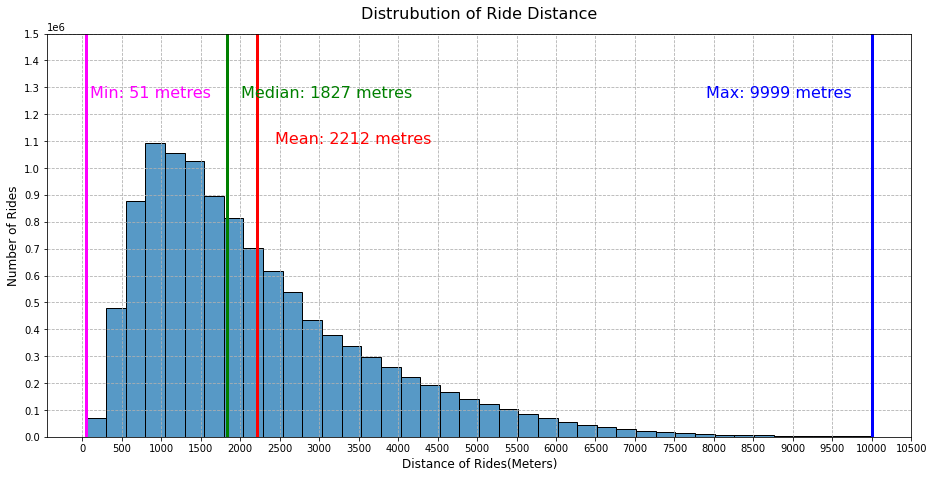

In [ ]:
df_distance = df.copy()

fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

distance = df_distance["distance"]
sns.histplot(distance, bins = 40)
ax.grid(zorder=0, linestyle='dashed')

# adding mean and median lines
plt.axvline(distance.mean(), color='red', linestyle='-', linewidth=3 )
plt.axvline(distance.median(), color='green', linestyle='-', linewidth=3 )
plt.axvline(distance.min(), color='magenta', linestyle='-', linewidth=3 )
plt.axvline(distance.max(), color='blue', linestyle='-', linewidth=3 )

min_ylim, max_ylim = plt.ylim()
plt.text(distance.mean()*1.1, max_ylim*0.95, 'Mean: {:.0f} metres'.format(distance.mean()), color = 'red',  fontsize= 16)
plt.text(distance.median()*1.1, max_ylim*1.1, 'Median: {:.0f} metres'.format(distance.median()), color = 'green', fontsize= 16)
plt.text(distance.min()+ 50, max_ylim*1.1, 'Min: {:.0f} metres'.format(distance.min()), color = 'magenta', fontsize= 16)
plt.text(distance.max()-2100, max_ylim*1.1, 'Max: {:.0f} metres'.format(distance.max()), color = 'blue', fontsize= 16)

# plot ticks
ticks =range(0, 11000, 500)
plt.xticks(ticks)
ticks =range(0, 1600000, 100000)
plt.yticks(ticks)

# plot x,y labels
plt.xlabel("Distance of Rides(Meters)", fontsize= 12, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 12)

plt.title('Distrubution of Ride Distance', fontdict={"fontsize":16}, pad = 15);



##### Distubution of Ride Duration

What is the mean, median, min, and max distrubution of Ride Duation and what are the trends?

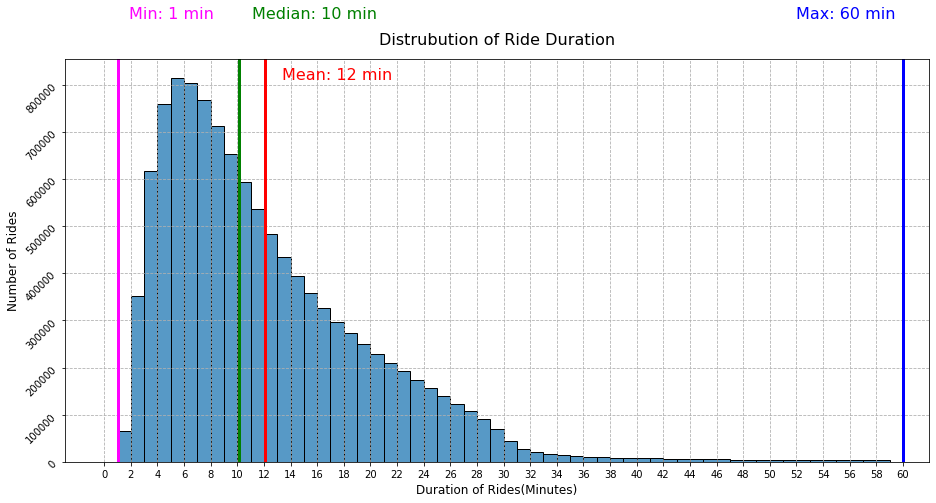

In [ ]:
df_duration = df.copy()
    
# Converting seconds to minutes
df_duration["duration"] = df_duration["duration"]/60
    
# Filtering relevant data
duration = df_duration["duration"]
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(zorder=0, linestyle='dashed')
sns.histplot(duration, bins= range(60))

# adding mean and median lines
plt.axvline(duration.mean(),color='red', linestyle='-', linewidth=3 )
plt.axvline(duration.median(), color='green', linestyle='-', linewidth=3 )
plt.axvline(duration.min(), color='magenta', linestyle='-', linewidth=3 )
plt.axvline(duration.max(), color='blue', linestyle='-', linewidth=3 )

# plot x,y labels
plt.xlabel("Duration of Rides(Minutes)", fontsize= 12, x = 0.5)
plt.ylabel("Number of Rides", fontsize= 12)

min_ylim, max_ylim = plt.ylim()
plt.text(duration.mean()*1.1, max_ylim*0.95, 'Mean: {:.0f} min'.format(duration.mean()), color = 'red',  fontsize= 16)
plt.text(duration.median()*1.1, max_ylim*1.1, 'Median: {:.0f} min'.format(duration.median()), color = 'green', fontsize= 16)
plt.text(duration.min()*1.8, max_ylim*1.1, 'Min: {:.0f} min'.format(duration.min()), color = 'magenta', fontsize= 16)
plt.text(duration.max()-8, max_ylim*1.1, 'Max: {:.0f} min'.format(duration.max()), color = 'blue', fontsize= 16)

# plot ticks
ticks =range(0, 62, 2)
plt.xticks(ticks)
ticks =range(0, 1200000, 100000)
plt.yticks(rotation=45)


plt.title('Distrubution of Ride Duration', fontdict={"fontsize":16}, pad = 15);

##### Number of rides over time

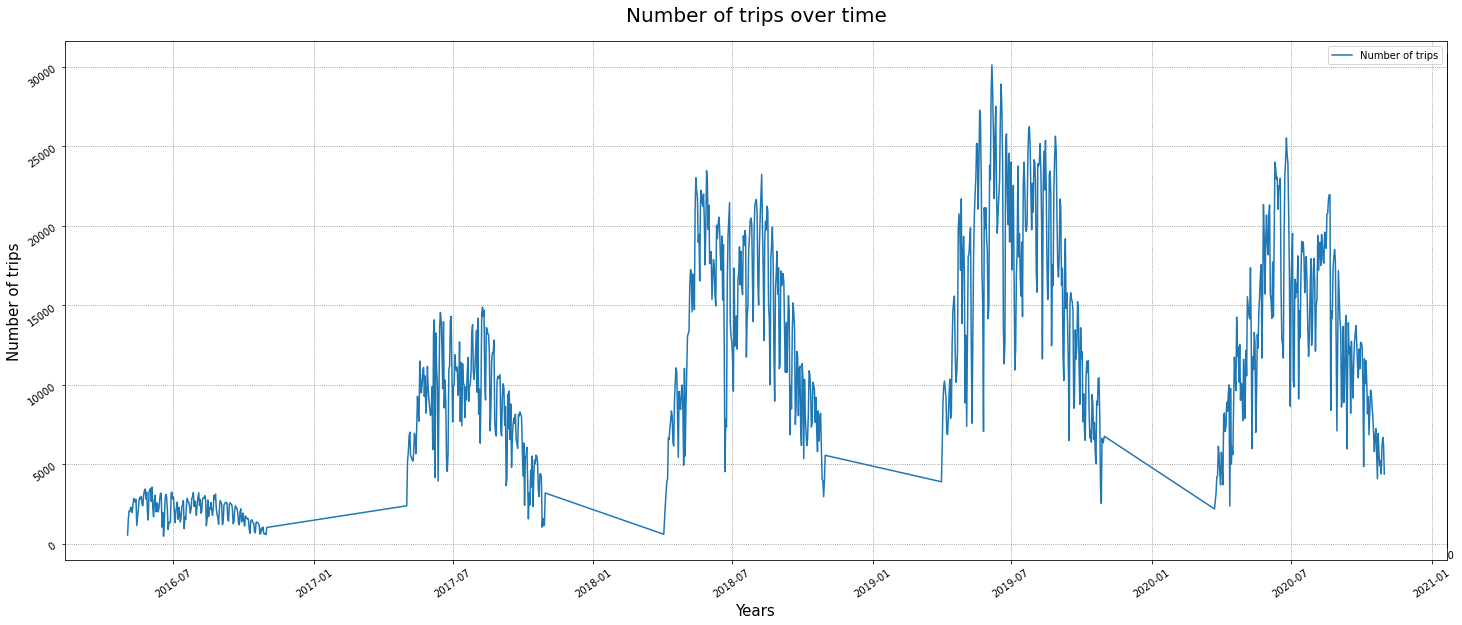

In [ ]:
df_time = df.copy()
df_time = df_time.groupby(df_time['departure'].dt.date).size().reset_index(name='count')
# Figure
fig, ax = plt.subplots(figsize=(24,9))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(zorder=0, linestyle='dashed')
sns.lineplot(x = 'departure', y = 'count', data= df_time)

# Labels
ax.set_title("Number of trips over time", fontsize= 20, pad= 20)
ax.set_ylabel("Number of trips", fontsize=15)
ax.set_xlabel("Years", fontsize=15)

# Grid & Legend
plt.grid(linestyle=":", color='grey')
plt.legend(["Number of trips"])
plt.yticks(rotation= 35)
plt.xticks(rotation= 35)

plt.show()

#### Top 10 Departure Stations in 2020

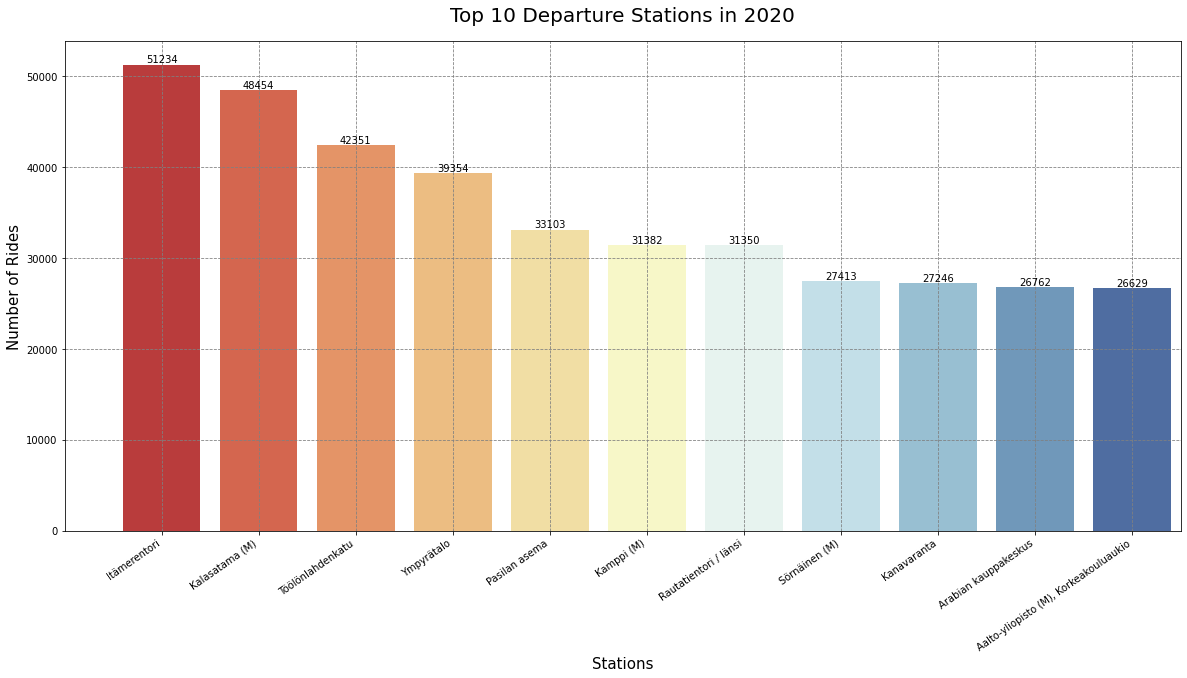

In [ ]:
df_departure = df.copy()
departure = df_departure[df_departure['departure'].dt.year == 2020]

# Figure
sequential_colors = sns.color_palette("RdYlBu", 11)
fig = plt.figure(figsize=(20,9))
ax = sns.countplot(x="departure_name", data=departure, 
              order = departure['departure_name'].value_counts().index,
              palette=sequential_colors)
for container in ax.containers:
    ax.bar_label(container)

# Labeling Axes
plt.xticks(rotation=35, ha="right")
plt.xlabel("Stations", fontsize= 15)
plt.ylabel("Number of Rides", fontsize= 15, x = -100)
plt.xlim(-1,10.5)

# Adding Grid & Title
plt.grid(linestyle="--", color='grey')
ax.set_title("Top 10 Departure Stations in 2020", fontsize= 20, pad= 20)
plt.show()

#### Top 10 Arrival Stations in 2020

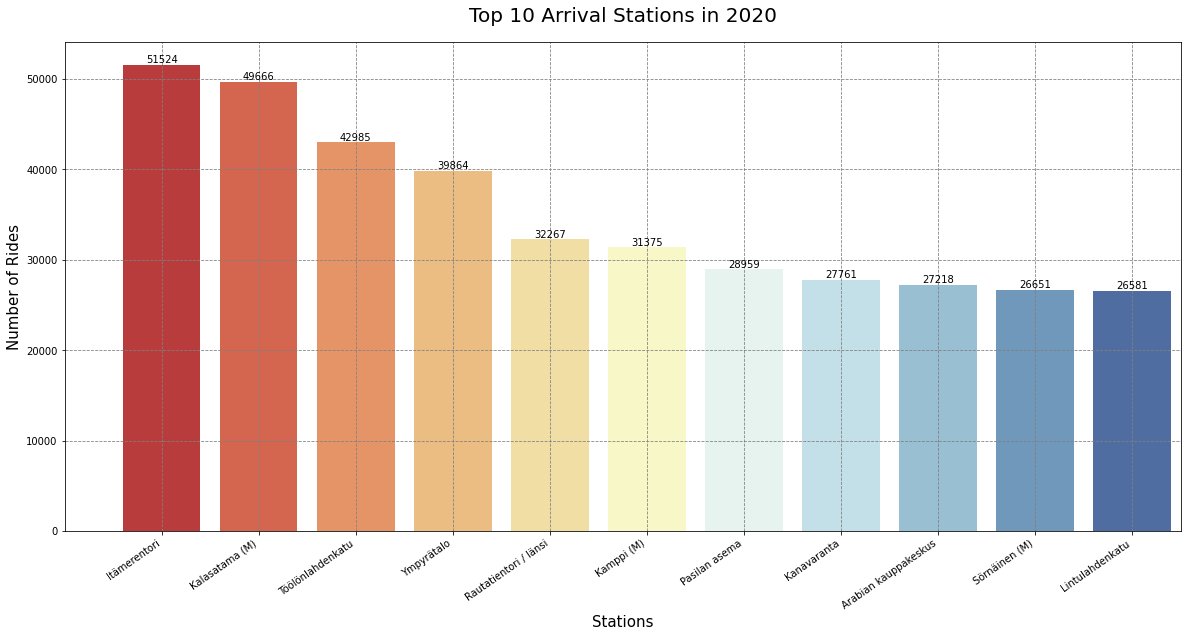

In [ ]:
df_arrival = df.copy()
arrival = df_arrival[df_arrival['return'].dt.year == 2020]


# Figure
sequential_colors = sns.color_palette("RdYlBu", 11)
fig = plt.figure(figsize=(20,9))
ax = sns.countplot(x="return_name", data=departure, 
              order = departure['return_name'].value_counts().index,
              palette=sequential_colors)
for container in ax.containers:
    ax.bar_label(container)

# Labeling Axes
plt.xticks(rotation=35, ha="right")
plt.xlabel("Stations", fontsize= 15)
plt.ylabel("Number of Rides", fontsize= 15, x = -100)
plt.xlim(-1,10.5)

# Adding Grid & Title
plt.grid(linestyle="--", color='grey')
ax.set_title("Top 10 Arrival Stations in 2020", fontsize= 20, pad= 20)
plt.show()

It seems that the first arrival and departure stations are the same which makes sense considering they are the most densly popultated areas in Helsinki.

#### Explore Map sections

use taxifare model to import map and revise longitude and latitude.

In [ ]:
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [ ]:
#set centre location for Helsinki
center_location = [60.1699, 24.9384]
m = folium.Map(location=center_location, control_scale=True, zoom_start=11)

In [ ]:
#find extremes of location data
for col in ["departure_latitude", 
            "departure_longitude", "return_latitude", 
            "return_longitude"]:
    MIN = df[col].min()
    MAX = df[col].max()
    print(col, MIN, MAX)

departure_latitude 60.147921 60.23910894200569
departure_longitude 24.721367 25.10619874297898
return_latitude 60.147921 60.23910894200569
return_longitude 24.721367 25.10619874297898


In [ ]:
# add a count to each row 
df["count"] =1
# assign variables to heatmap_data and add to Heatmap
heatmap_data = df.head(1000000)[['departure_latitude', 'departure_longitude', 'count']].groupby(['departure_latitude', 'departure_longitude']).sum().reset_index().values.tolist()
gradient = {0.1: 'blue', 0.15: 'lime', 0.2: 'orange', 0.4: 'red'}
HeatMap(data=heatmap_data, radius=5, 
        gradient=gradient, max_zoom=13, 
        min_opacity= 0.5, max_opacity= 0.7).add_to(m)
m

#### Distubution of rides per hour

In [ ]:
def extract_time_features(df):
    '''This function extracts each hour, day, week ,and year
    from the time column
    '''
    time_column = "departure"
    df.index = pd.to_datetime(df[time_column])
    
    df["dow"] = df.index.weekday
    df["hour"] = df.index.hour
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df.reset_index(drop=True)
df = extract_time_features(df)

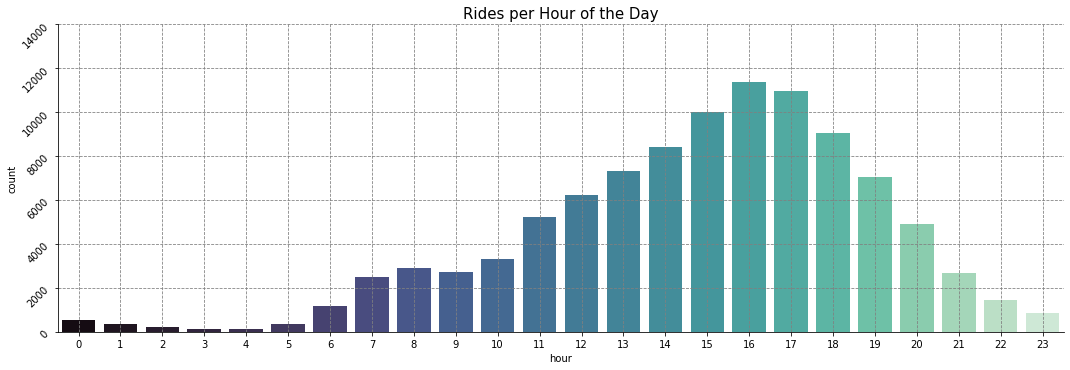

In [ ]:
# plotting the catplot for distrubution of rides per hour of the day
sns.catplot(x="hour", kind="count", data=df.head(100000), height=5, aspect=3, palette='mako');
sns.despine()
plt.title('Rides per Hour of the Day', fontsize= 15)
plt.grid(linestyle="--", color='grey')
plt.ylim(0,14000)
plt.yticks(rotation=45)

plt.show()

As expected, the most popular hours are between 13:00 and 19:00. This maybe due to sunlight levels in low winter which I will explore later on in the EDA.

#### Hour against Temperature

#### Distubution of rides per day of the week

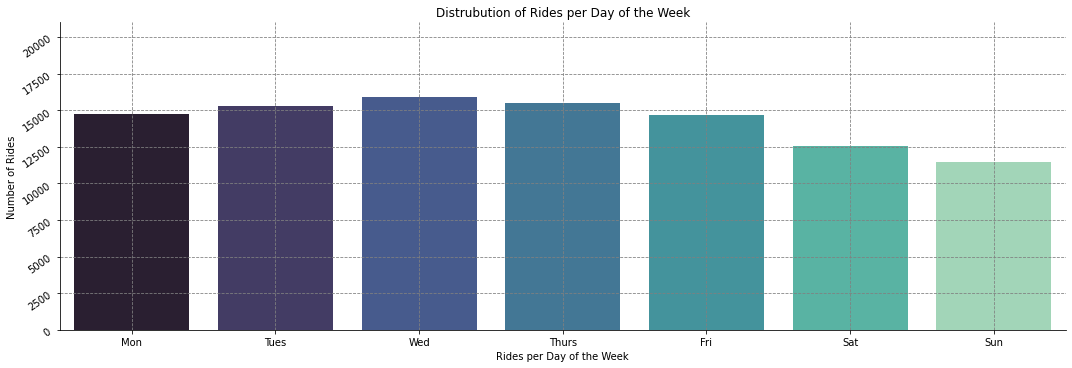

In [ ]:
# plotting rideshare per day

dow = sns.catplot(x="dow", kind="count", data=df.sample(100000), 
                 height=5, aspect=3,palette='mako');
sns.despine()
plt.ylim(0,21000)
plt.grid(linestyle="--", color='grey')
plt.xlabel('Rides per Day of the Week')
plt.title('Distrubution of Rides per Day of the Week')
plt.ylabel('Number of Rides')
plt.yticks(rotation = 35)
dow.set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.show()

Unexpectedly, the most popular days for rental are Wednesday and Thursday. Lack of data to explain this.

#### Temperature distribution

In [ ]:
temp_df = df.copy()

In [ ]:
# rounding down temeratures to an integer
temp_df['temperature'] = temp_df['temperature'].apply(np.floor)

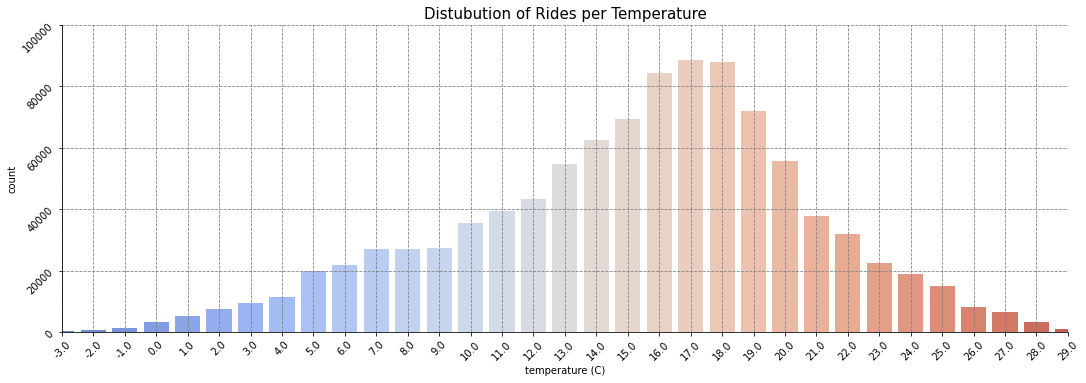

In [ ]:
# plotting the catplot for distrubution of rides per temperature
sns.catplot(x="temperature", kind="count", data=temp_df.sample(1000000) 
            ,height=5, aspect=3, palette="coolwarm");
sns.despine()
plt.title('Distubution of Rides per Temperature',fontsize= 15)
plt.grid(linestyle="--", color='grey')
plt.ylim(0,100000)
plt.xlim(3,35)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.xlabel('temperature (C)')

plt.show()

As expected, the most rides taken in Helsinki is around 18C in summer.

In [ ]:
temp_df = extract_time_features(temp_df)

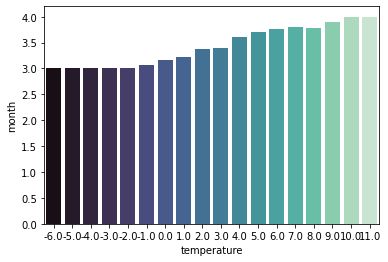

In [ ]:
sns.barplot(x="temperature", y= 'month', data=temp_df.head(100000),ci= 0.8, palette='mako');

#### Heatmap of departures per hour 

This map shows every pick up point per hour of the day in 2020

In [ ]:
heatmap_data_by_hour = []
__df__ = df.head(100000)
for hour in df.hour.sort_values().unique():
    _df = __df__[__df__.hour == hour][['departure_latitude', 
                                       'departure_longitude',
                                       'count']].groupby(['departure_latitude',
                                                          'departure_longitude']).sum().reset_index().values.tolist()
    heatmap_data_by_hour.append(_df)

In [ ]:
m2 = folium.Map(location=center_location, control_scale=True, zoom_start=11)
HeatMapWithTime(heatmap_data_by_hour, radius=5,
                gradient=gradient,auto_play=True,
                min_opacity=0.5, max_opacity=0.8,
                use_local_extrema=False).add_to(m2)
m2

A useful look at main pickup points for bikes within the city centre. 

#### Distance Distubution

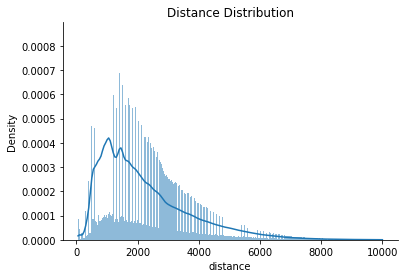

In [ ]:
def plot_dist(series=df["distance"], title="Distance Distribution"):
    sns.histplot(series, kde=True, stat='density', discrete=True)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

In [ ]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [ ]:
df['delta_lon'] = df.departure_longitude - df.return_longitude
df['delta_lat'] = df.departure_latitude - df.return_latitude
df['direction'] = calculate_direction(df.delta_lon, df.delta_lat)

<AxesSubplot:>

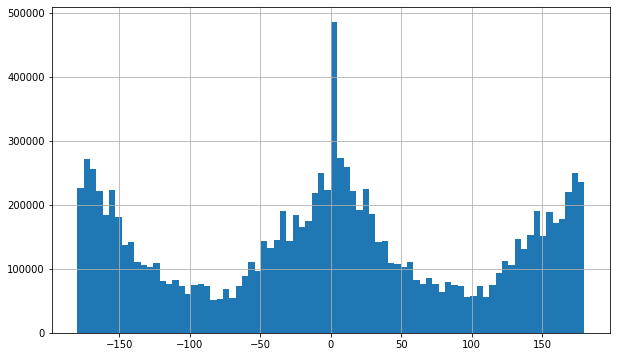

In [ ]:
plt.figure(figsize=(10,6))
df.direction.hist(bins=80)

END